In [1]:
from historical_dataset import make_dataset, make_cross_validation_dataset
import matplotlib.pyplot as plt
%matplotlib inline
from global_vars import SEED as seed
plt.rcParams['figure.figsize'] = [15, 5]

import ensembles
import importlib
importlib.reload(ensembles) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import networks
importlib.reload(networks) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt







data = make_dataset(train_p=0.8,seed=seed)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
X_train = X
y_train =y 

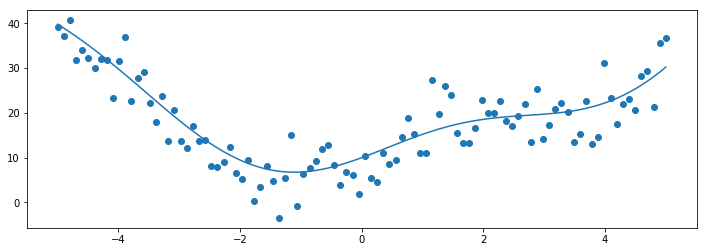

In [2]:
plt.scatter(X[sorted_index],y[sorted_index])
plt.plot(X[sorted_index],generate_sinoid(X[sorted_index]))

In [3]:
num_epochs = 7500
num_eps = 75#25#75
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[10,15,5],
          'num_epochs':num_epochs,
          'learning_rate':0.1,
          'seed':seed,
         'optimizer':tf.train.AdamOptimizer,
         #'initialisation_scheme':tf.truncated_normal
         }




ensemble = [{'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,20],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        

    
bootstrap_ensemble_stats = {'num_neurons':[10,15,5],'num_epochs':num_epochs,'optimizer':tf.train.AdamOptimizer,
         'initialisation_scheme':tf.truncated_normal}


(20,)
(20, 1)


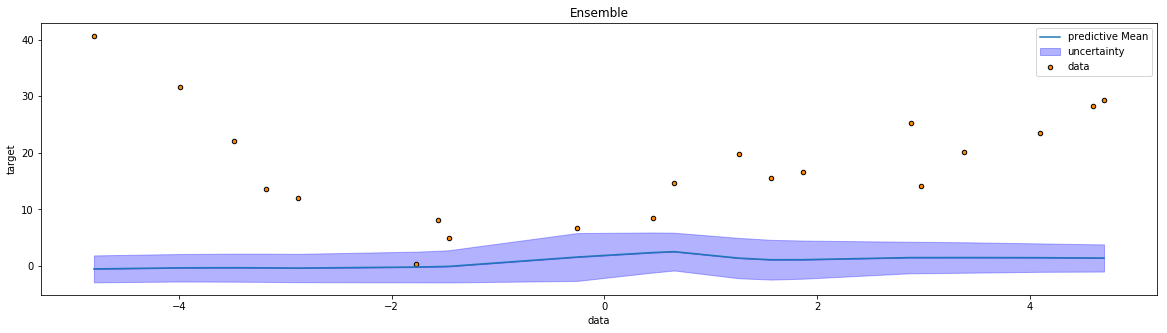

In [4]:
vanialla_ensemble = ensembles.VanillaEnsemble(estimator_stats = ensemble)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


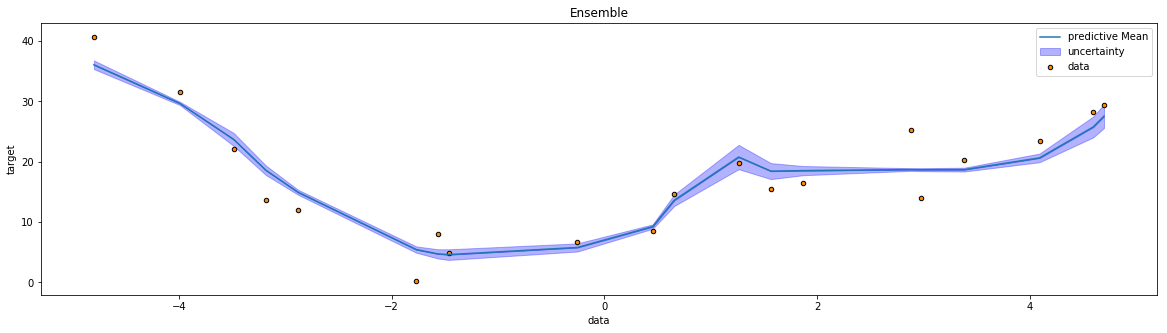

In [5]:
vanialla_ensemble.fit(X_train,y_train)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


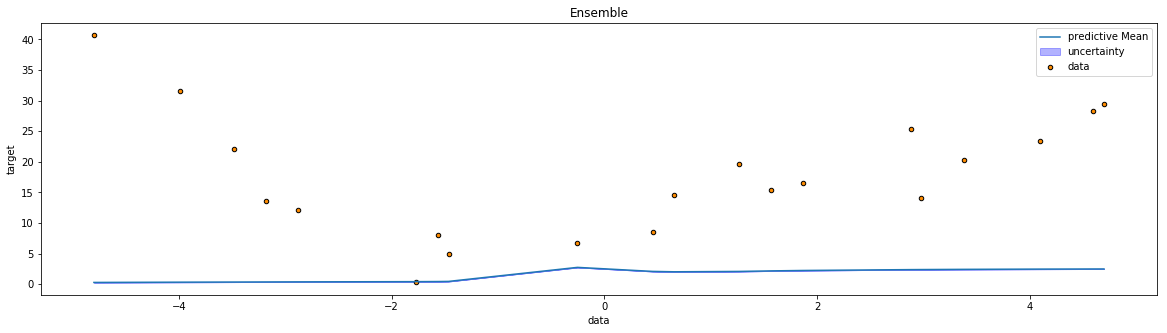

In [6]:
bootstrap_ensemble = ensembles.BootstrapEnsemble(estimator_stats = bootstrap_ensemble_stats)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


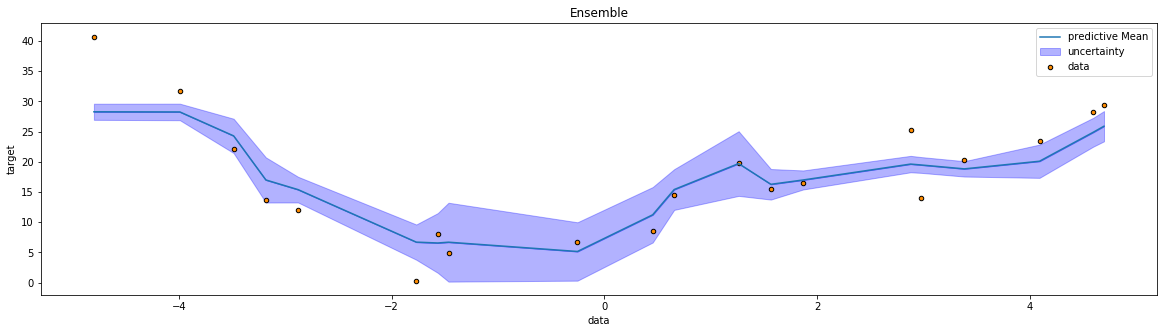

In [7]:
bootstrap_ensemble.fit(X_train,y_train)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


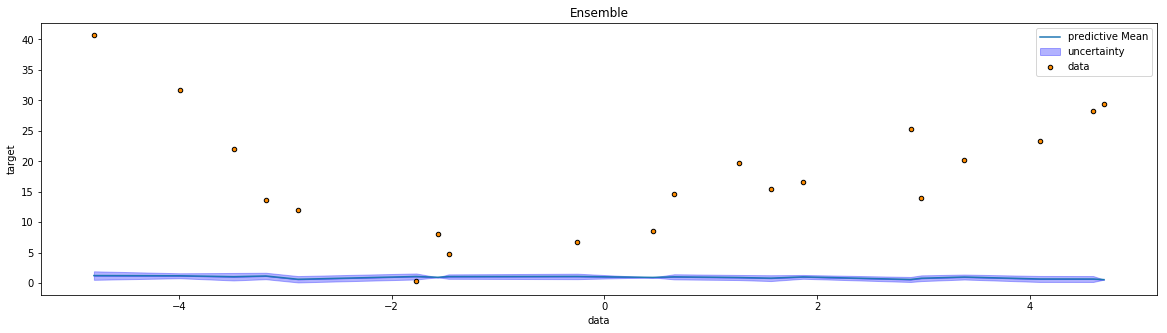

In [8]:
dropout_network = networks.DropoutNetwork(**params)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


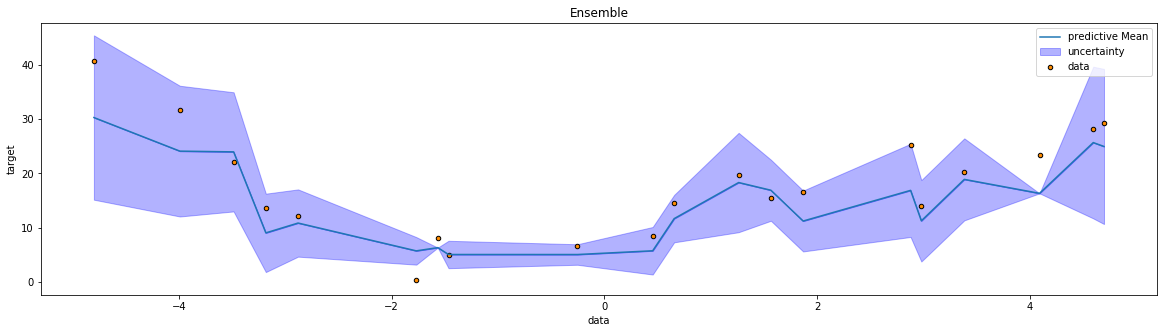

In [9]:
dropout_network.fit(X_train,y_train)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


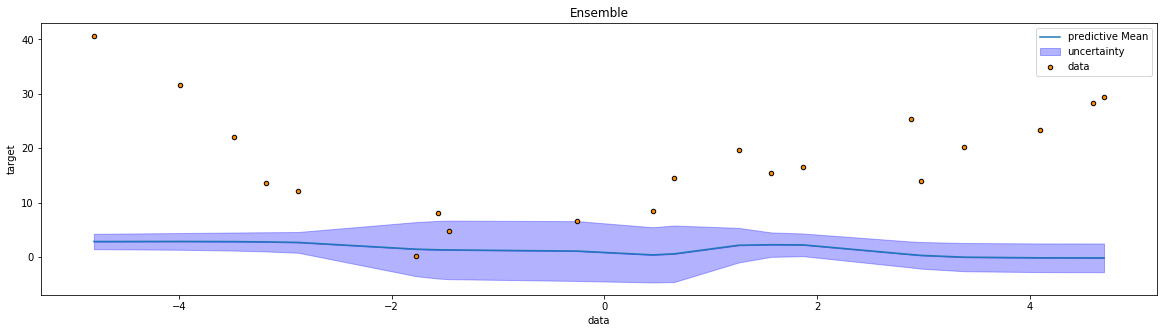

In [12]:
gl_network = networks.GaussianLossNetwork(**params)
plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(20,)
(20, 1)


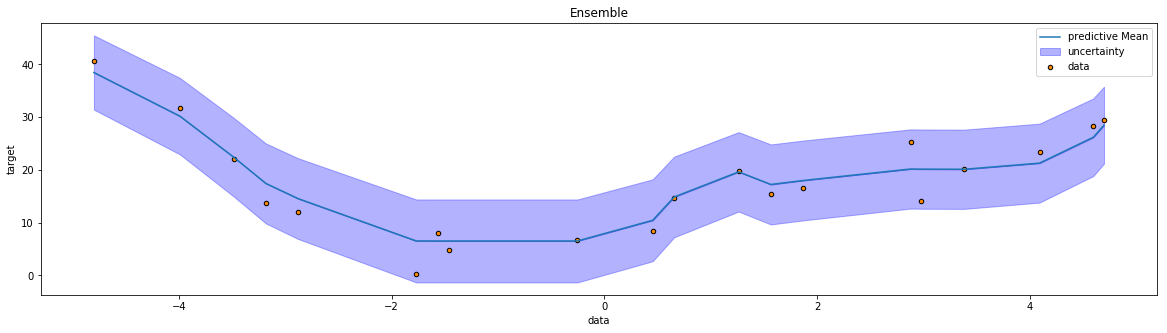

In [13]:
gl_network.fit(X_train,y_train,False)

plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))
